### 案例一：给定一个二维数据集，使用K-means进行聚类

In [1]:
import numpy as np
import scipy.io as sio
import matplotlib.pyplot as plt

In [2]:
data1 = sio.loadmat('data/ex7data2.mat')
data1.keys()

dict_keys(['__header__', '__version__', '__globals__', 'X'])

In [3]:
X = data1['X']
X.shape

(300, 2)

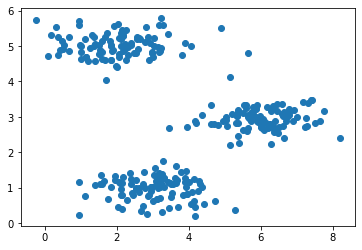

In [4]:
plt.scatter(X[:, 0], X[:, 1])
plt.show()

#### 1. 获取每个样本所属的聚类

In [5]:
def find_centroids(X, centros):
    idx = []  # 保存 X 中每个样本所属的聚类的索引
    
    for i in range(len(X)):
        dist = np.linalg.norm((X[i] - centros), axis=1)   #  （2, ） （k, 2) ===>  (k, 2)
        id_i = np.argmin(dist)   # 获取最小值的索引
        idx.append(id_i)
        
    return np.array(idx)

In [6]:
centros = np.array([[3, 3], [6, 2], [8, 5]])
idx = find_centroids(X, centros)
idx

array([0, 2, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 2, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0,
       1, 2, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1,
       1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 0], d

#### 2. 取平均，计算聚类中心点

In [7]:
def compute_centros(X, idx, k):
    centros = []
    
    for i in range(k):
        centros_i = np.mean(X[idx==i], axis=0)
        centros.append(centros_i)
        
    return np.array(centros)

In [8]:
compute_centros(X, idx, k=3)

array([[2.42830111, 3.15792418],
       [5.81350331, 2.63365645],
       [7.11938687, 3.6166844 ]])

#### 3. 运行k-means，重复步骤1和2

In [9]:
def run_kmeans(X, centros, iters):
    k = len(centros)
    centros_all = []
    centros_all.append(centros)
    
    centros_i = centros
    for i in range(iters):
        idx = find_centroids(X, centros_i)   # 获取本轮迭代所有样本的聚类索引
        centros_i = compute_centros(X, idx, k)   # 取平均，计算新的聚类中心点
        centros_all.append(centros_i)   # 记录每次迭代的中心点
        
    return idx, np.array(centros_all)

#### 绘制数据集和聚类中心的移动轨迹

In [10]:
def plot_data(X, centros_all, idx):
    plt.figure()
    
    plt.scatter(X[:, 0], X[:, 1], c=idx, cmap='rainbow')  # 绘制数据集
    
    plt.plot(centros_all[:, :, 0], centros_all[:, :, 1], 'kx--')

In [11]:
idx, centros_all = run_kmeans(X, centros, iters=10)

In [12]:
idx, centros_all

(array([0, 2, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
        1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
        1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
        1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
        1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
        1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
        2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 2, 2,
        2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
        2, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
        2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 

In [13]:
centros_all[0], centros_all[0][0],  centros_all[0][0][0]

(array([[3., 3.],
        [6., 2.],
        [8., 5.]]),
 array([3., 3.]),
 3.0)

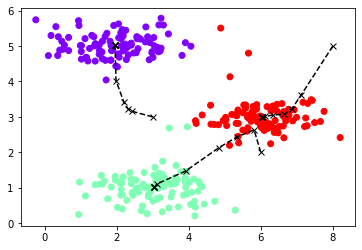

In [14]:
plot_data(X, centros_all, idx)

#### 观察聚类初始点的位置对聚类效果的影响

In [15]:
# 随机生成聚类中心
def init_centros(X, k):
    index = np.random.choice(len(X), k)
    return X[index] # 随机返回 k 个X的样本

In [16]:
init_centros(X, k=3)

array([[1.38133497, 5.00194962],
       [1.85776553, 4.86962414],
       [4.8255341 , 2.77961664]])

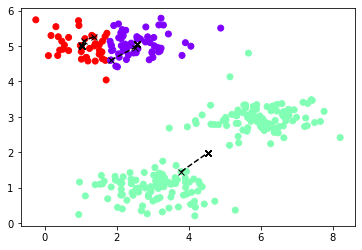

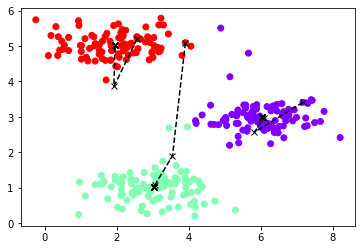

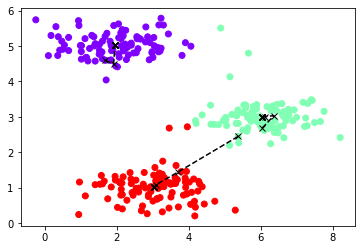

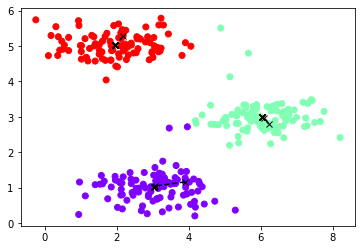

In [17]:
for i in range(4):
    idx, centros_all = run_kmeans(X, init_centros(X, k=3), iters=10)
    plot_data(X, centros_all, idx)

### 案例二：使用kmeans对图片颜色进行聚类
RGB图像，每个像素点有R、G、B三个值 0~255

In [18]:
data_img = sio.loadmat('data/bird_small.mat')
data_img.keys()

dict_keys(['__header__', '__version__', '__globals__', 'A'])

In [19]:
A = data_img['A']
A.shape

(128, 128, 3)

In [20]:
from skimage import io

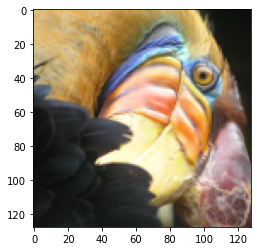

In [21]:
image = io.imread('data/bird_small.png')
plt.imshow(image)

In [22]:
# 标准化
A = A / 255
A = A.reshape(-1, 3)

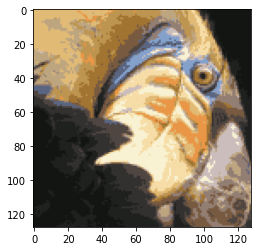

In [23]:
k = 16
idx_img, centros_all_img = run_kmeans(A, init_centros(A, k=16), iters=20)
centros_img = centros_all_img[-1]  # 最后一次迭代的聚类中心位置

im = np.zeros(A.shape)
for i in range(k):
    im[idx_img==i] = centros_img[i]   # [idx_img == i]的意义是：找 i 聚类的所有点的索引
im = im.reshape(128, 128, 3)
plt.imshow(im)